In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import sk
import sklearn

In [2]:
#importing the dataset
dataset = pd.read_csv('./csv_files/marketing_customer_analysis.csv')

In [3]:
dataset.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
#obtain the numerical variables
numericals = dataset.select_dtypes(np.number)
numericals.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [5]:
#check for multicollinearity
correlations_matrix = numericals.corr()
display(correlations_matrix)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


None of the variables shows any high abs(corr) with reference to Total claim amounbt. with correlation coefficient at 0.63. which is below the recommended high abs(corr) >=0.75
But for the sake of the exercise , we will still go ahead and train a model, even though in practise , it might prove less useful


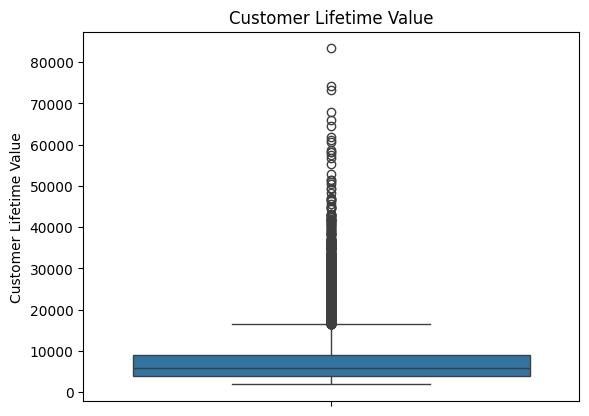

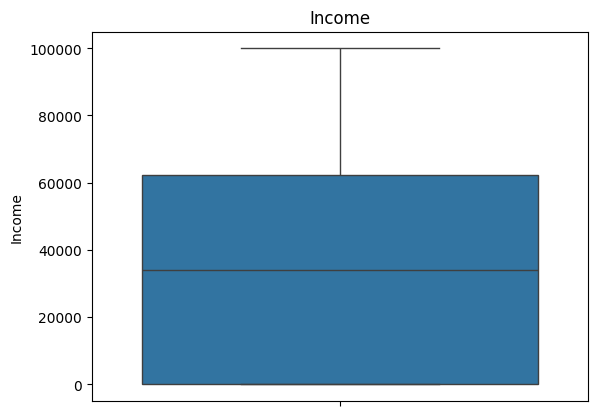

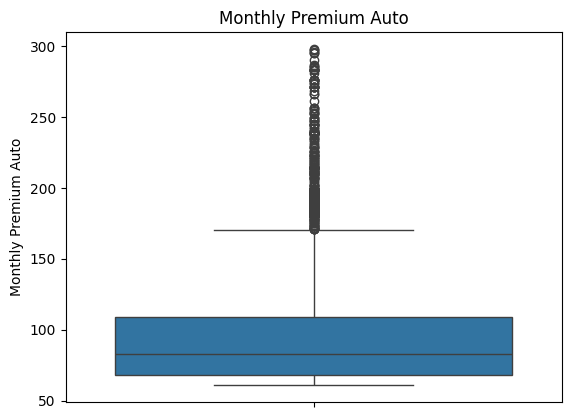

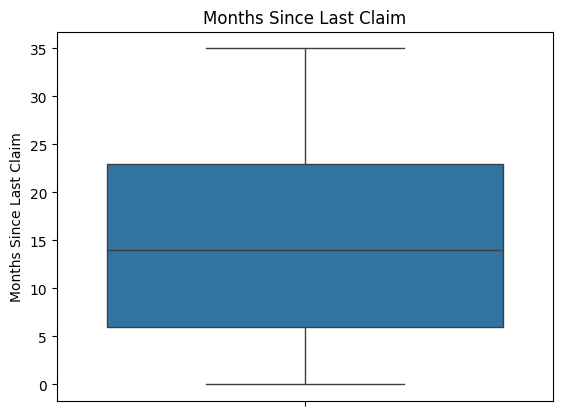

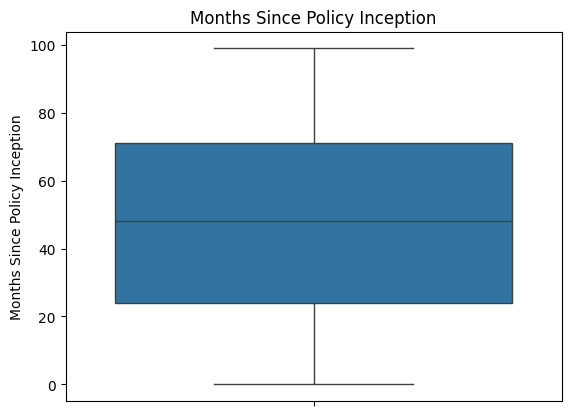

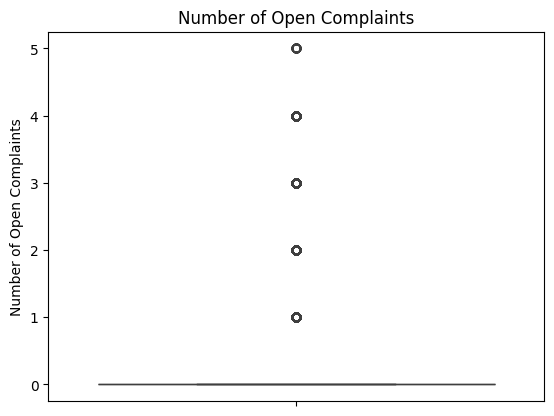

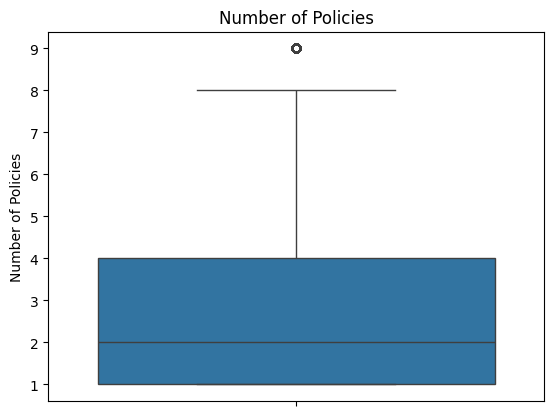

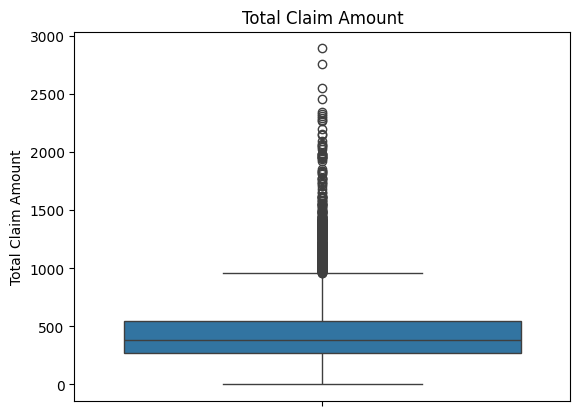

In [6]:
# drop outliers
#see boxplots of numericals, name each one of them
def boxplots_numericals(numericals: pd.DataFrame, cols: list=None):
    if cols is not None:
        for col in cols:
            sns.boxplot(numericals[col])
            plt.title(col)
            plt.show()
    else:
        for col in numericals.columns:
            sns.boxplot(numericals[col])
            plt.title(col)
            plt.show()        

boxplots_numericals(numericals)

No outlier, so we will just transform . distribution is heavily skewed to the right

#SPLIT


#differentiate categorical and numerical data
#X_num = X.select_dtypes(include = np.number)
#X_cat = X.select_dtypes(include = object)

In [9]:
#build x and y for train and testing
y = dataset['Total Claim Amount']
X = dataset.drop('Total Claim Amount', axis=1)
X= dataset.drop('Effective To Date', axis=1)

In [10]:
X.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [11]:
#drop ambigous columns
X = X.drop(['Policy'], axis=1)

#merge vehicle classes so that luxury SUV,luxury car are all luxury
X['Vehicle Class'] = X['Vehicle Class'].replace(['Luxury SUV','Luxury Car'], 'Luxury')


TRAIN TEST SPLIT

In [12]:
from sklearn.model_selection import train_test_split
#use the Train-test split to create the Train, and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [13]:
#Use the pd.DataFrame() function to create new Pandas DataFrames from the X_train, and X_test Numpy arrays obtained in the previous step (make sure to use the columns= option to set the columns names to X.columns)
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)


In [14]:
#split X_train_df into numerical and categorical
X_train_num = X_train_df.select_dtypes(np.number)
X_train_cat = X_train_df.select_dtypes(object)


In [15]:
#split X_test_df into numerical and categorical
X_test_num = X_test_df.select_dtypes(np.number)
X_test_cat = X_test_df.select_dtypes(object)

In [16]:
#get unique values of each categorical column and column names
categories = []
for i in X_train_cat.columns:
    categories.append(X_train_cat[i].unique())
    print(i, X_train_cat[i].unique())

Customer ['HW87852' 'AV17528' 'OS94884' ... 'NZ15548' 'OL72669' 'LV62981']
State ['Oregon' 'Nevada' 'Arizona' 'California' 'Washington']
Response ['No' 'Yes']
Coverage ['Basic' 'Premium' 'Extended']
Education ['Master' 'High School or Below' 'Bachelor' 'College' 'Doctor']
EmploymentStatus ['Medical Leave' 'Employed' 'Unemployed' 'Retired' 'Disabled']
Gender ['M' 'F']
Location Code ['Suburban' 'Rural' 'Urban']
Marital Status ['Married' 'Divorced' 'Single']
Policy Type ['Personal Auto' 'Corporate Auto' 'Special Auto']
Renew Offer Type ['Offer1' 'Offer2' 'Offer4' 'Offer3']
Sales Channel ['Agent' 'Branch' 'Web' 'Call Center']
Vehicle Class ['Four-Door Car' 'Sports Car' 'Two-Door Car' 'SUV' 'Luxury']
Vehicle Size ['Medsize' 'Large' 'Small']


In [17]:
#split X_train_cat into ordinal and nominal

#ordinal
X_train_ord = X_train_cat[['Coverage', 'Education', 'EmploymentStatus', 'Location Code', 'Policy Type', 'Renew Offer Type', 'Vehicle Class', 'Vehicle Size']]
#nominal
X_train_nom= X_train_cat[['State','Response','Gender','Marital Status','Sales Channel']]

In [18]:
#split X_test_cat into ordinal and nominal

#ordinal
X_test_ord = X_test_cat[['Coverage', 'Education', 'EmploymentStatus', 'Location Code', 'Policy Type', 'Renew Offer Type', 'Vehicle Class', 'Vehicle Size']]
#nominal
X_test_nom = X_test_cat[['State','Response','Gender','Marital Status','Sales Channel']]

In [ ]:
#encode nominal columns like gender, state, respone, sales channel,marital staus
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_train_nom)
X_train_nom_encoded_np = encoder.transform(X_train_nom).toarray()
X_train_nom_encoded_df = pd.DataFrame(X_train_nom_encoded_np, columns=encoder.get_feature_names_out(), 
                                     index=X_train_nom.index)

X_train_nom_encoded_df.head()

In [ ]:
#encode X_test_nom
X_test_nom_encoded_np = encoder.transform(X_test_nom).toarray()
X_test_nom_encoded_df = pd.DataFrame(X_test_nom_encoded_np, columns=encoder.get_feature_names_out(), 
                                     index=X_test_nom.index)

In [ ]:
import os
import pickle

path = "encoders/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

filename = "encoder1.pkl" # Use a descriptive name for your scaler/transformer but keep the ".pkl" file extension
with open(path+filename, "wb") as file:
    pickle.dump(encoder, file)

In [ ]:
#for x_train_ordinal, assign order to the values
X_train_ord['Coverage'] = X_train_ord['Coverage'].replace(['Basic','Extended','Premium'],[1,2,3])
X_train_ord['Education'] = X_train_ord['Education'].replace(['High School or Below','College','Bachelor','Master','Doctor'],[1,2,3,4,5])
X_train_ord['EmploymentStatus'] = X_train_ord['EmploymentStatus'].replace(['Unemployed','Medical Leave','Disabled','Employed','Retired'],[1,2,3,4,5])
X_train_ord['Location Code'] = X_train_ord['Location Code'].replace(['Rural','Suburban','Urban',],[1,2,3])
X_train_ord['Policy Type'] = X_train_ord['Policy Type'].replace(['Personal Auto','Corporate Auto','Special Auto'],[1,2,3])
X_train_ord['Renew Offer Type'] = X_train_ord['Renew Offer Type'].replace(['Offer1','Offer2','Offer3','Offer4'],[1,2,3,4])
X_train_ord['Vehicle Size'] = X_train_ord['Vehicle Size'].replace(['Small','Medsize','Large'],[1,2,3])
X_train_ord['Vehicle Class'] = X_train_ord['Vehicle Class'].replace(['Two-Door Car','Four-Door Car','SUV','Sports Car','Luxury'],[1,2,3,4,5])


In [ ]:
#for x_test_ordinal, assign order to the values
X_test_ord['Coverage'] = X_test_ord['Coverage'].replace(['Basic','Extended','Premium'],[1,2,3])
X_test_ord['Education'] = X_test_ord['Education'].replace(['High School or Below','College','Bachelor','Master','Doctor'],[1,2,3,4,5])
X_test_ord['EmploymentStatus'] = X_test_ord['EmploymentStatus'].replace(['Unemployed','Medical Leave','Disabled','Employed','Retired'],[1,2,3,4,5])
X_test_ord['Location Code'] = X_test_ord['Location Code'].replace(['Rural','Suburban','Urban',],[1,2,3])
X_test_ord['Policy Type'] = X_test_ord['Policy Type'].replace(['Personal Auto','Corporate Auto','Special Auto'],[1,2,3])
X_test_ord['Renew Offer Type'] = X_test_ord['Renew Offer Type'].replace(['Offer1','Offer2','Offer3','Offer4'],[1,2,3,4])
X_test_ord['Vehicle Size'] = X_test_ord['Vehicle Size'].replace(['Small','Medsize','Large'],[1,2,3])
X_test_ord['Vehicle Class'] = X_test_ord['Vehicle Class'].replace(['Two-Door Car','Four-Door Car','SUV','Sports Car','Luxury'],[1,2,3,4,5])


In [ ]:
X_train_ord.head()

In [ ]:
X_test_ord.head()

In [ ]:
#get distributions of numericals
def distributions_numericals(df: pd.DataFrame):
    for i in df.columns:
        sns.displot(numericals[i])
        plt.title(i)
        plt.show()




In [ ]:
distributions_numericals(X_train_num)

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
pt.fit(X_train_num)
X_train_num_transformed = pt.transform(X_train_num)
X_train_num_transformed_df = pd.DataFrame(X_train_num_transformed, columns=X_train_num.columns, index=X_train_num.index)
#X_train_num_transformed = pt.transform(X_train_num)

In [ ]:
#transform X_test_num
X_test_num_transformed = pt.transform(X_test_num)
X_test_num_transformed_df = pd.DataFrame(X_test_num_transformed, columns=X_test_num.columns, index=X_test_num.index)

In [ ]:
#save the transformer
import os

path = "transformers/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

filename = "ptTranform.pkl" # Use a descriptive name for your scaler/transformer but keep the ".pkl" file extension
with open(path+filename, "wb") as file:
  pickle.dump(pt, file)

In [ ]:
#reset index of X_train_ord
X_train_ord = X_train_ord.reset_index(drop=True)

#reset index of X_train_nom_encoded_df
X_train_nom_encoded_df = X_train_nom_encoded_df.reset_index(drop=True)

In [ ]:
#reset index of X_test_ord
X_test_ord = X_test_ord.reset_index(drop=True)

#reset index of X_test_nom_encoded_df
X_test_nom_encoded_df = X_test_nom_encoded_df.reset_index(drop=True)

In [ ]:
#concat X_train_encoded_df and X_train_ord
categorical_transformed = pd.concat([X_train_nom_encoded_df, X_train_ord], axis=1)
categorical_transformed.head()

In [ ]:
#concat X_test_encoded_df and X_test_ord
categorical_transformed_test = pd.concat([X_test_nom_encoded_df, X_test_ord], axis=1)

In [ ]:
categorical_transformed.isna().sum()

In [ ]:
X_train_num_transformed_df.head()

In [ ]:
X_test_num_transformed_df.head()

In [ ]:
#reset index of X_train_num_transformed_df
X_train_num_transformed_df = X_train_num_transformed_df.reset_index(drop=True)

#reset index of X_test_num_transformed_df
X_test_num_transformed_df = X_test_num_transformed_df.reset_index(drop=True)

In [ ]:
#concat transformed numericals and transformed categoricals
X_train_transformed = pd.concat([X_train_num_transformed_df, categorical_transformed], axis=1)
X_train_transformed.head()

In [ ]:
#check for nan values
X_train_transformed.isna().sum()

In [ ]:
#concat X_test_num_transformed_df and categorical_transformed_test
X_test_transformed = pd.concat([X_test_num_transformed_df, categorical_transformed_test], axis=1)
X_test_transformed.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_train_transformed)
X_train = transformer.transform(X_train_transformed)


#min max scaler for X_test_transformed
X_test = transformer.transform(X_test_transformed)

In [ ]:
path = "scalers/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
  # Create a new directory because it does not exist
  os.makedirs(path)
  print("The new directory is created!")

filename = "scaled_train.pkl" # use a descriptive name for your encoder but keep the ".pkl" file extension
with open(path+filename, "wb") as file:
   pickle.dump(transformer, file)

In [ ]:
#apply linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)


In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
#Compute the following metrics for your Train and Test sets:R2.MSE.RMSE.MAE.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)

print('r2:', r2)
print('mse:', mse)
print('rmse:', rmse)
print('mae:', mae)


In [ ]:
#create  dataframe to summarize metrics, 
results = {"Set": ["Train"]*X_train.shape[0] + ["Test"]*X_test.shape[0], 
           "Real": list(y_train) + list(y_test),
           "Predicted": list(y_train_pred) + list(y_test_pred)}

results_df = pd.DataFrame(results)
results_df['Errors'] = results_df['Real'] - results_df['Predicted']
results_df.head()